In [5]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

rate_jac (generic function with 1 method)

In [6]:
using JLD2, CairoMakie, GLMakie

In [57]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:];

In [7]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Map LSE\\Hopf_Fold")

In [8]:
len = 250
map_dim = " $(len)x$(len) "
name = " tau_D article2 for Hopf Fold Hom"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

"u0s 250x250  tau_D article2 for Hopf Fold Hom.jld2"

In [13]:
Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

I0range = range( -0.7, -4.00,  length = len )
U0range = range( 0.4,  0.0, length = len )

0.4:-0.001606425702811245:0.0

In [41]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\bifurcationkit\\")

In [44]:
hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"]

91-element Vector{Float64}:
 0.39015617400068303
 0.34619494900406894
 0.3082815905629896
 0.27608553577129286
 0.24915304713569425
 0.2269622034301519
 0.20981706898342442
 0.19663254937559183
 0.1865531455488229
 0.17891131378654157
 ⋮
 0.29457727887920915
 0.3069072777457076
 0.31912036052211457
 0.33142395106449996
 0.34462153550506247
 0.3588697220872016
 0.3743344649670391
 0.39119960425682254
 0.4

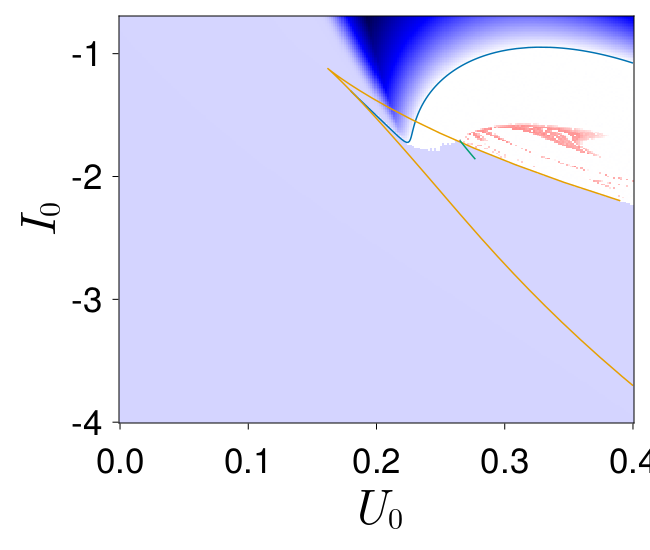

In [61]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

I0start, I0end = 1, 250 #80, 200
U0start, U0end = 1, 250 #110, 120

f = Figure(resolution = (650, 550))
ticksize = 35
tickpad = 10.0

ax1 = Axis(f[1, 1], xlabel = L"U_0",ylabel = L"I_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax1, U0range[U0start:U0end], I0range[I0start:I0end], transpose(Λs[I0start:I0end, U0start:U0end, index]),
colormap = :seismic, colorrange = (mn, mx))

lines!(ax1, hp_codim2_1U0, hp_codim2_1I0)
lines!(ax1, sn_codim2_1U0, sn_codim2_1I0)
lines!(ax1, u0_hom, I0_hom)
lines!(ax1, u0_hom_st, I0_hom_st)

CairoMakie.activate!()
display(f);

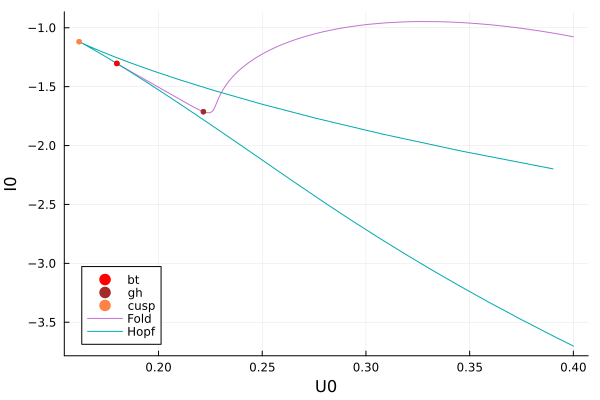

In [12]:
GLMakie.activate!()
display(GLMakie.Screen(), f);